In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\5th sem\INT374 Predictive analysis\CA2 datasets\student-mat.csv", sep = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
#Showing (rows, columns)
df.shape
print()

#describe
df.describe()
print()

#Raw dataset info
df.info()
print()

# checking for missing values
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher  

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [17]:
#Creating new cloumns (Positive value → improvement, Negative value → decline, Zero → stable behavior)
df["grade_change_1_2"] = df["G2"] - df["G1"]
df["grade_change_2_3"] = df["G3"] - df["G2"]

In [20]:
#Creating Classification Target (Pass, Fail)
df["pass_fail"] = np.where(df["G3"] >= 10, 1, 0)

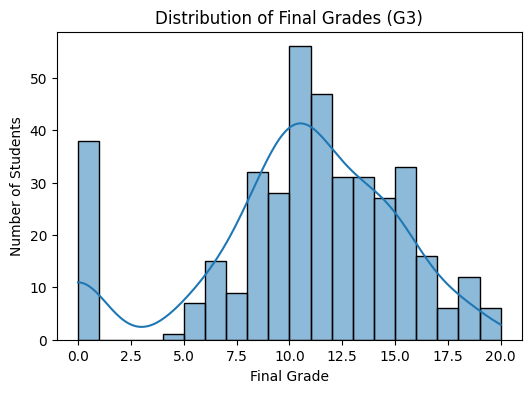

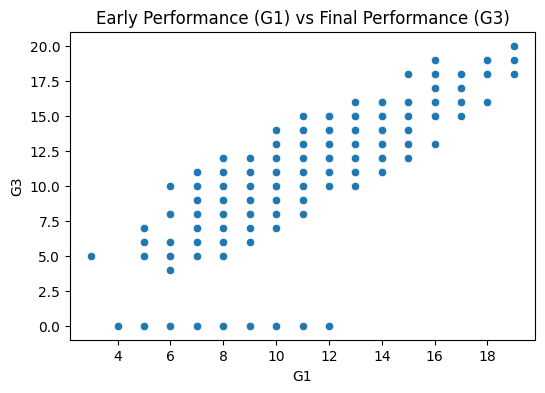

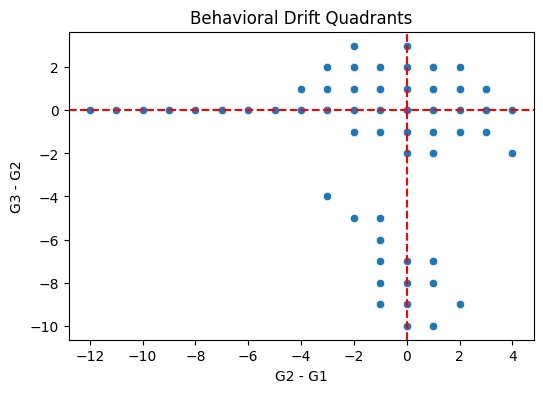

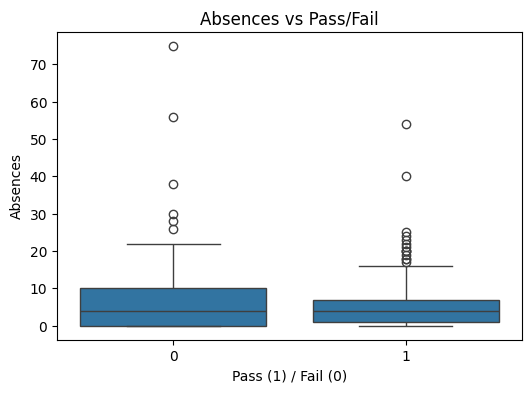

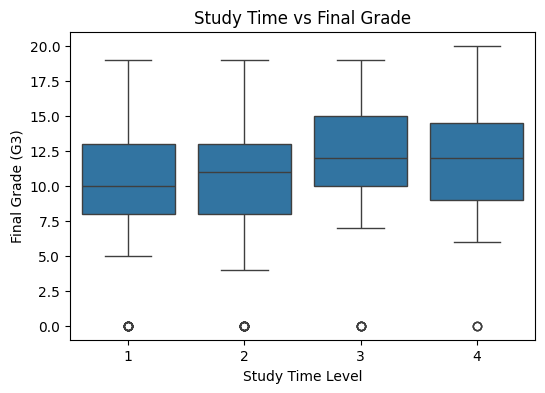

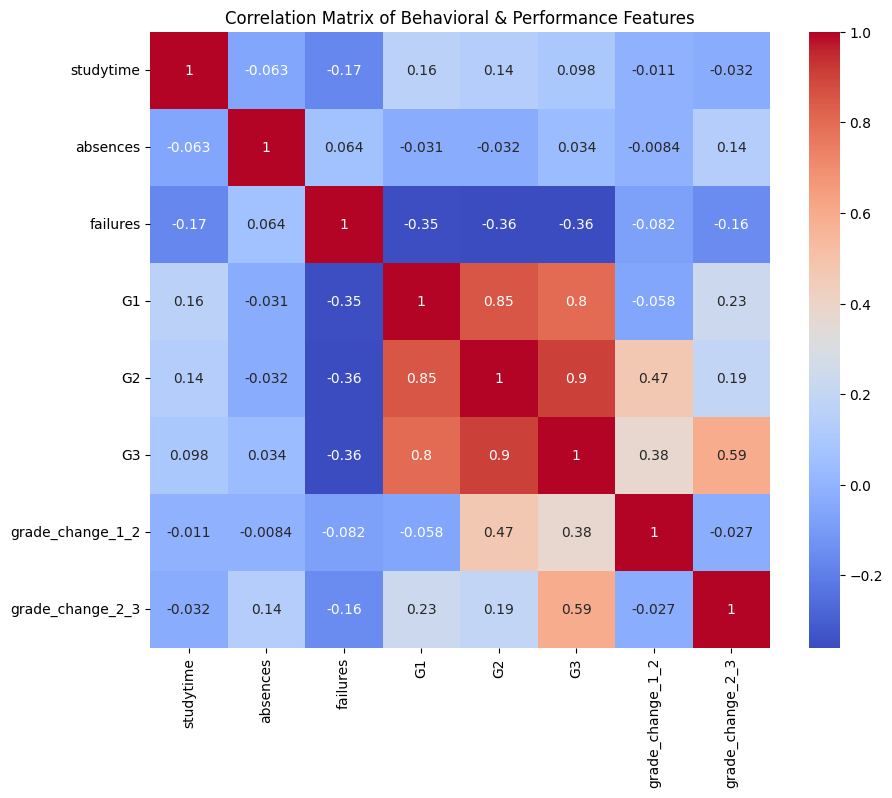

In [26]:
#Distribution of Final Grades (G3)
plt.figure(figsize=(6,4))
sns.histplot(df["G3"], bins=20, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()

#Relationship Between Early & Final Performance
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["G1"], y=df["G3"])
plt.title("Early Performance (G1) vs Final Performance (G3)")
plt.xlabel("G1")
plt.ylabel("G3")
plt.show()

#Behavioral Drift Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["grade_change_1_2"], y=df["grade_change_2_3"])
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.title("Behavioral Drift Quadrants")
plt.xlabel("G2 - G1")
plt.ylabel("G3 - G2")
plt.show()
#Top-right → improving students, Bottom-left → declining students, Mixed → unstable behavior

#Absences vs Performance
plt.figure(figsize=(6,4))
sns.boxplot(x=df["pass_fail"], y=df["absences"])
plt.title("Absences vs Pass/Fail")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Absences")
plt.show()

#Study Time vs Final Grade
plt.figure(figsize=(6,4))
sns.boxplot(x=df["studytime"], y=df["G3"])
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time Level")
plt.ylabel("Final Grade (G3)")
plt.show()

#Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df[["studytime", "absences", "failures", "G1", "G2", "G3",
           "grade_change_1_2", "grade_change_2_3"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Behavioral & Performance Features")
plt.show()
#G1, G2 strongly correlate with G3, Absences negatively correlate with performance, Drift features show meaningful relationships

In [29]:
#Data Pre-processing
features = [
    "studytime",
    "absences",
    "failures",
    "G1",
    "G2",
    "grade_change_1_2",
    "grade_change_2_3"
]

X = df[features]
y_class = df["pass_fail"]
y_reg = df["G3"]

#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Test Train Spliting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)

X_train, X_test, y_train_cls, y_test_cls = train_test_split(
    X_scaled, y_class, test_size=0.2, random_state=42
)

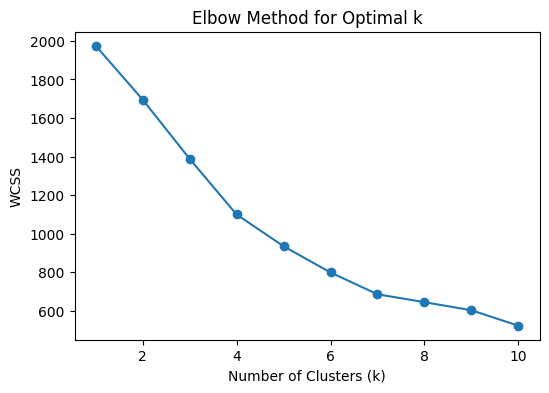

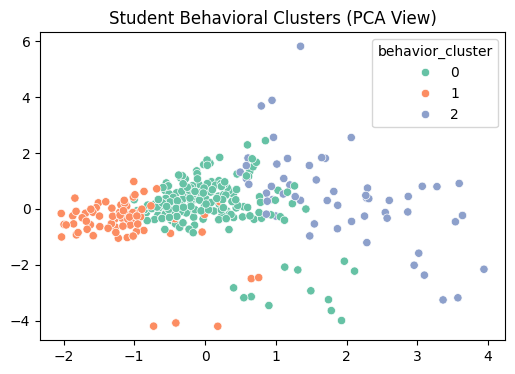

In [32]:
#BEHAVIORAL CLUSTERING (implementing K-Means and Hierarchical Clustering)

#K-Means
cluster_features = [
    "studytime",
    "absences",
    "failures",
    "grade_change_1_2",
    "grade_change_2_3"
]

X_cluster = df[cluster_features]

from sklearn.preprocessing import StandardScaler
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

#Finding optimal number of clusters (Elbow method)
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
#student get's a behavior group label
df["behavior_cluster"] = kmeans.fit_predict(X_cluster_scaled)
df.groupby("behavior_cluster")[cluster_features].mean()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df["behavior_cluster"],
    palette="Set2"
)
plt.title("Student Behavioral Clusters (PCA View)")
plt.show()

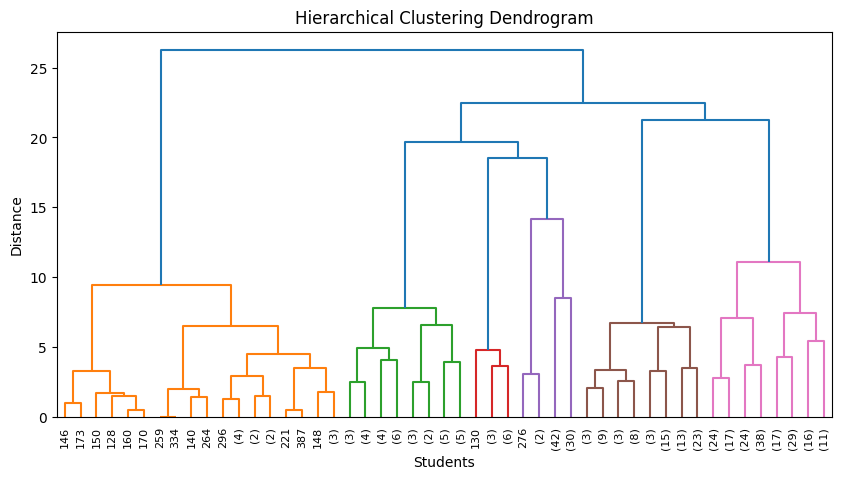

hc_cluster,0,1,2
behavior_cluster,,,
0,176,13,63
1,77,6,3
2,0,6,51


In [42]:
#Hierarchical Clustring
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_cluster_scaled, method="ward")
plt.figure(figsize=(10,5))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Students")
plt.ylabel("Distance")
plt.show()

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3)
df["hc_cluster"] = hc.fit_predict(X_cluster_scaled)

pd.crosstab(df["behavior_cluster"], df["hc_cluster"])

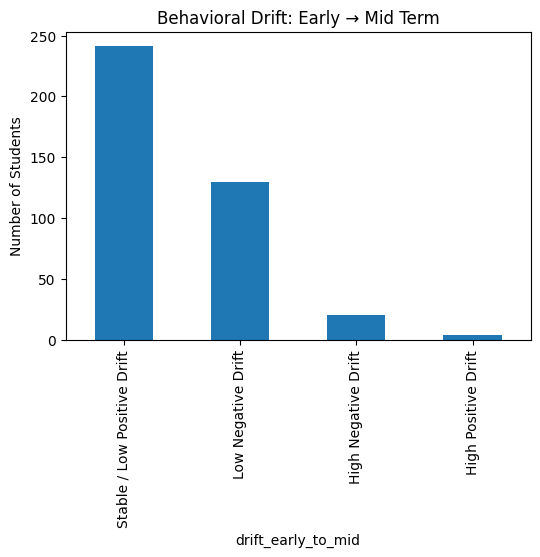

In [35]:
#BEHAVIORAL DRIFT DETECTION

def drift_category(change):
    if change <= -3:
        return "High Negative Drift"
    elif -3 < change < 0:
        return "Low Negative Drift"
    elif 0 <= change <= 3:
        return "Stable / Low Positive Drift"
    else:
        return "High Positive Drift"

df["drift_early_to_mid"] = df["grade_change_1_2"].apply(drift_category)
df["drift_mid_to_final"] = df["grade_change_2_3"].apply(drift_category)

plt.figure(figsize=(6,4))
df["drift_early_to_mid"].value_counts().plot(kind="bar")
plt.title("Behavioral Drift: Early → Mid Term")
plt.ylabel("Number of Students")
plt.show()

In [40]:
#Creating stage-wise datasets

#Early Stage (G1 behavior)
early_features = ["studytime", "absences", "failures", "G1"]
X_early = df[early_features]

X_early_scaled = StandardScaler().fit_transform(X_early)

#Mid Stage (G2 behavior)
mid_features = ["studytime", "absences", "failures", "G2"]
X_mid = df[mid_features]

X_mid_scaled = StandardScaler().fit_transform(X_mid)

#clustring each stage seperately
kmeans_early = KMeans(n_clusters=3, random_state=42)
df["cluster_early"] = kmeans_early.fit_predict(X_early_scaled)

kmeans_mid = KMeans(n_clusters=3, random_state=42)
df["cluster_mid"] = kmeans_mid.fit_predict(X_mid_scaled)

cluster_transition = pd.crosstab(
    df["cluster_early"],
    df["cluster_mid"],
    rownames=["Early Cluster"],
    colnames=["Mid Cluster"]
)

cluster_transition

Mid Cluster,0,1,2
Early Cluster,,,
0,199,11,82
1,29,29,0
2,0,44,1


In [41]:
#Defining cluster Drift Flag
df["cluster_drift"] = np.where(
    df["cluster_early"] != df["cluster_mid"],
    1,
    0
)

df["overall_drift"] = np.where(
    (df["cluster_drift"] == 1) & (df["grade_change_1_2"] < 0),
    "Critical Drift",
    "Non-Critical / Stable"
)

pd.crosstab(df["overall_drift"], df["pass_fail"])

pass_fail,0,1
overall_drift,,
Critical Drift,42,29
Non-Critical / Stable,88,236


In [43]:
#Modeling data
model_features = [
    "studytime",
    "absences",
    "failures",
    "G1",
    "G2",
    "grade_change_1_2",
    "grade_change_2_3",
    "behavior_cluster",
    "cluster_drift"
]

X = df[model_features]
y_class = df["pass_fail"]
y_reg = df["G3"]

#Scaling again becuase we added new features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)

X_train, X_test, y_train_cls, y_test_cls = train_test_split(
    X_scaled, y_class, test_size=0.2, random_state=42
)

In [44]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_cls)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test_cls, y_pred_lr))
print(classification_report(y_test_cls, y_pred_lr))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        52

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



In [45]:
#K-Nearest Neighbour(KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_cls)

y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test_cls, y_pred_knn))

KNN Accuracy: 0.9240506329113924


In [46]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train_cls)

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test_cls, y_pred_nb))

Naive Bayes Accuracy: 0.9113924050632911


In [48]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train_cls)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test_cls, y_pred_dt))

Decision Tree Accuracy: 0.9493670886075949


In [49]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_cls)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test_cls, y_pred_rf))

Random Forest Accuracy: 0.9620253164556962


In [50]:
#Support Vector Machine(SVM)
from sklearn.svm import SVC

svm = SVC(kernel="rbf")
svm.fit(X_train, y_train_cls)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test_cls, y_pred_svm))

SVM Accuracy: 0.9493670886075949


In [51]:
#Classification Summary Table
results_cls = pd.DataFrame({
    "Model": ["Logistic", "KNN", "Naive Bayes", "Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test_cls, y_pred_lr),
        accuracy_score(y_test_cls, y_pred_knn),
        accuracy_score(y_test_cls, y_pred_nb),
        accuracy_score(y_test_cls, y_pred_dt),
        accuracy_score(y_test_cls, y_pred_rf),
        accuracy_score(y_test_cls, y_pred_svm)
    ]
})

results_cls

,Model,Accuracy
0,Logistic,1.000000
1,KNN,0.924051
2,Naive Bayes,0.911392
3,Decision Tree,0.949367
4,Random Forest,0.962025
5,SVM,0.949367


In [52]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train_reg)

y_pred_lr_reg = lr.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lr_reg)))
print("R2:", r2_score(y_test_reg, y_pred_lr_reg))

RMSE: 6.331832912448744e-15
R2: 1.0


In [54]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y_reg, test_size=0.2, random_state=42
)

poly_reg = LinearRegression()
poly_reg.fit(X_train_p, y_train_p)

y_pred_poly = poly_reg.predict(X_test_p)

print("Poly RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred_poly)))
print("Poly R2:", r2_score(y_test_p, y_pred_poly))

Poly RMSE: 1.1297596972300967e-14
Poly R2: 1.0


In [55]:
#Regression Comparision Table
results_reg = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test_reg, y_pred_lr_reg)),
        np.sqrt(mean_squared_error(y_test_p, y_pred_poly))
    ],
    "R2 Score": [
        r2_score(y_test_reg, y_pred_lr_reg),
        r2_score(y_test_p, y_pred_poly)
    ]
})

results_reg

,Model,RMSE,R2 Score
0,Linear Regression,6.331833e-15,1.0
1,Polynomial Regression,1.129760e-14,1.0


In [ ]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(rf, "classifier.pkl")     # best classifier
joblib.dump(lr, "regressor.pkl")      # regression model
joblib.dump(kmeans, "kmeans.pkl")


: 